# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

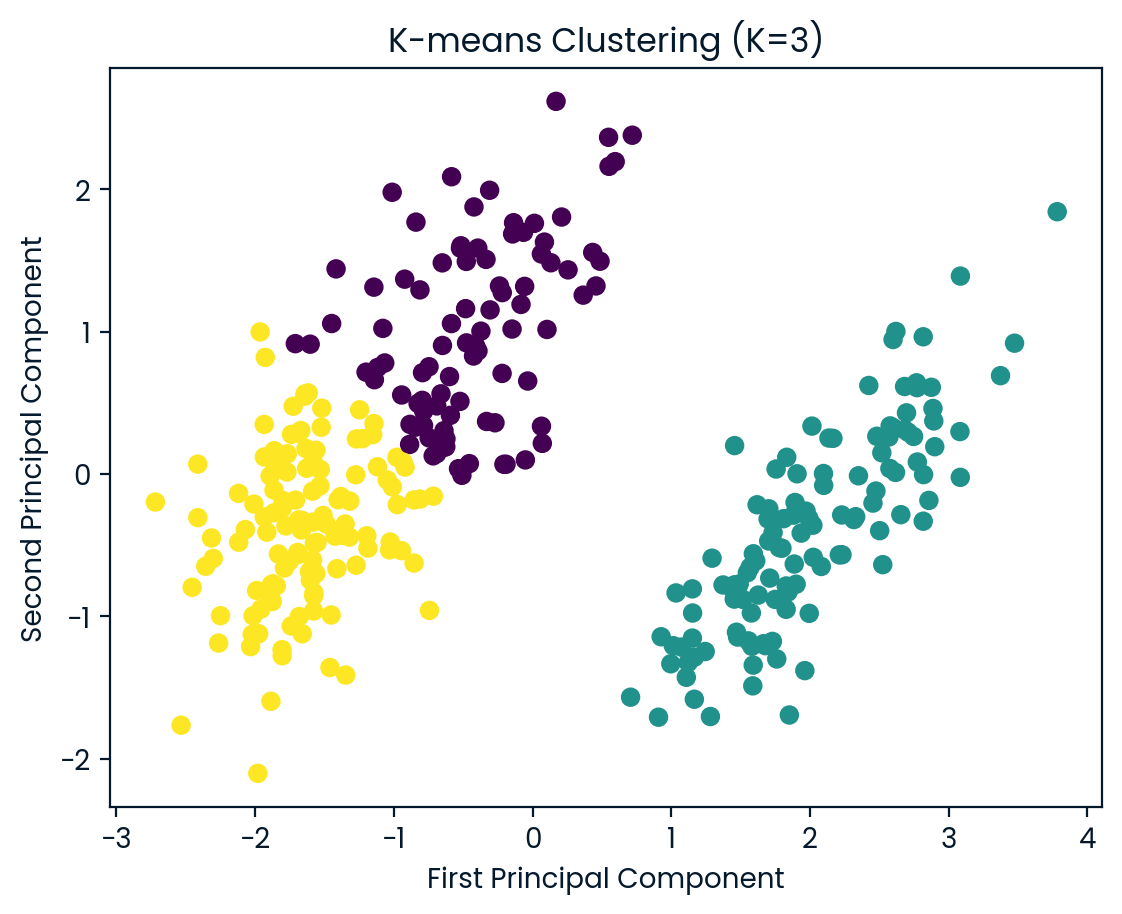

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             46.913043        18.881522         197.119565
1             47.568067        14.996639         217.235294
2             38.333884        17.959504         187.917355


In [2]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

# Investigate and clean the dataset by removing the null values and outliers.
# Save as a cleaned DataFrame called penguins_clean.
penguins_clean = penguins_df.dropna()
penguins_clean = penguins_clean[penguins_clean["flipper_length_mm"] < 4000]
penguins_clean = penguins_clean[penguins_clean["flipper_length_mm"] > 0]
penguins_clean = penguins_clean[(penguins_clean["sex"] == "MALE") | (penguins_clean["sex"] == "FEMALE")]

# Pre-process the cleaned data using standard scaling and the one-hot encoding to add dummy variables:
# - Create the dummy variables and remove the original categorical feature from the dataset.
# - Scale the data using the standard scaling method.
# - Save the updated data as a new DataFrame called penguins_preprocessed.
df = pd.get_dummies(penguins_clean).drop('sex_FEMALE', axis=1).drop('sex_MALE', axis=1)
scaler = StandardScaler()
scaler.fit(df)
penguins_preprocessed = pd.DataFrame(data=scaler.transform(df), columns=df.columns)

# Perform Principal Component Analysis (PCA) on the penguins_preprocessed dataset
# to determine the desired number of components,
# considering any component with an explained variance ratio above 10% as a suitable component.
# Save the number of components as a variable called n_components.
# Finally, execute PCA using n_components and store the result as penguins_PCA.
model = PCA(n_components=None)
modelfit = model.fit(penguins_preprocessed)

ratios = modelfit.explained_variance_ratio_

n_components = 0
for element in ratios:
    if element >= 0.1:
        n_components += 1

PCA_n_components = PCA(n_components=n_components)
penguins_PCA = PCA_n_components.fit_transform(penguins_preprocessed)

# Employ k-means clustering on the penguins_PCA dataset, setting random_state=42,
# to determine the number of clusters through elbow analysis.
# Save the optimal number of clusters in a variable called n_cluster.
inertias = []
for i in range(20):
    model = KMeans(n_clusters=i+1, random_state=42)
    model_fit = model.fit(penguins_PCA)
    inertias.append(model_fit.inertia_)
    # plt.scatter(x=i+1, y=model_fit.inertia_)

# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

n_cluster = 3

# Create and fit a new k-means cluster model, setting n_cluster equal to your n_cluster variable,
# saving the model as a variable called kmeans. Visualize your clusters using the first two principle components.
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans = kmeans.fit(penguins_PCA)

first = penguins_PCA[:, 0]
second = penguins_PCA[:, 1]
plt.scatter(first, second, c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_cluster})')
plt.show()

# Add the label column extracted from the k-means clustering (using kmeans.labels_) to the penguins_clean DataFrame.
penguins_clean["label"] = kmeans.labels_

# Create a statistical table by grouping penguins_clean based on the "label" column
# and calculating the mean of each numeric column. Save this table as stat_penguins.
stat_penguins = \
    penguins_clean[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']].groupby("label").agg("mean")
print(stat_penguins)
